<a href="https://colab.research.google.com/github/Jason-Gitau/Neural-Networks/blob/main/version%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from PIL import Image
import numpy as np
from tensorflow.keras.utils import to_categorical

# Function to preprocess a custom image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))                # Resize to 28x28 pixels
    img = np.array(img)                      # Convert to NumPy array
    img = 255 - img                          # Invert colors if necessary
    img = (img > 128).astype('float32')      # Binarize the image
    img = img.reshape(1, 784) / 255.0        # Flatten and normalize
    return img

# List of paths to your custom images
custom_image_paths = ['/content/digi1.jpg', '/content/digi2.jpg', '/content/digi3.jpg','/content/digi4.jpg','/content/digi5.jpg','/content/digi6.jpg','/content/digi7.jpg','/content/digit 9.jpg','/content/digit8.jpg']

# True labels for your custom images
custom_labels = [1,2,3,4,5,6,7,9,8]  # Replace with your actual labels

# Preprocess all custom images
custom_images = np.vstack([preprocess_image(path) for path in custom_image_paths])

# Convert labels to one-hot encoding

custom_labels_one_hot = to_categorical(custom_labels, num_classes=10)

In [4]:
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess MNIST data
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Combine MNIST training data with custom data
x_combined = np.vstack([x_train, custom_images])
y_combined = np.vstack([y_train, custom_labels_one_hot])

# Shuffle the combined dataset
from sklearn.utils import shuffle
x_combined, y_combined = shuffle(x_combined, y_combined, random_state=42)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Input layer + first hidden layer
    Dense(64, activation='relu'),                       # Second hidden layer
    Dense(10, activation='softmax')                    # Output layer (10 classes)
])
# Define the Adam optimizer with a custom learning rate
custom_learning_rate = 0.01  # Try different values (e.g., 0.01, 0.001, 0.0001)
optimizer = Adam(learning_rate=custom_learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the combined dataset
model.fit(x_combined, y_combined, epochs=20, batch_size=32, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8815 - loss: 0.3773 - val_accuracy: 0.9296 - val_loss: 0.2519
Epoch 2/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9478 - loss: 0.1897 - val_accuracy: 0.9538 - val_loss: 0.1812
Epoch 3/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9589 - loss: 0.1531 - val_accuracy: 0.9562 - val_loss: 0.1575
Epoch 4/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9616 - loss: 0.1421 - val_accuracy: 0.9558 - val_loss: 0.1796
Epoch 5/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9657 - loss: 0.1295 - val_accuracy: 0.9555 - val_loss: 0.1975
Epoch 6/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9688 - loss: 0.1275 - val_accuracy: 0.9604 - val_loss: 0.1710
Epoch 7/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9698 - loss: 0.1151 - val_accuracy: 0.9663 - val_loss: 0.1577
Epoch 8/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9739 - loss: 0

Epoch 1/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9972 - loss: 0.0084 - val_accuracy: 0.9786 - val_loss: 0.1381
Epoch 2/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9971 - loss: 0.0091 - val_accuracy: 0.9790 - val_loss: 0.1272
Epoch 3/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9970 - loss: 0.0102 - val_accuracy: 0.9810 - val_loss: 0.1284
Epoch 4/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9974 - loss: 0.0072 - val_accuracy: 0.9781 - val_loss: 0.1339
Epoch 5/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9971 - loss: 0.0096 - val_accuracy: 0.9770 - val_loss: 0.1512
Epoch 6/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9975 - loss: 0.0075 - val_accuracy: 0.9768 - val_loss: 0.1773
Epoch 7/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9974 - loss: 0.0090 - val_accuracy: 0.9784 - val_loss: 0.1540
Epoch 8/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9975 - loss: 0

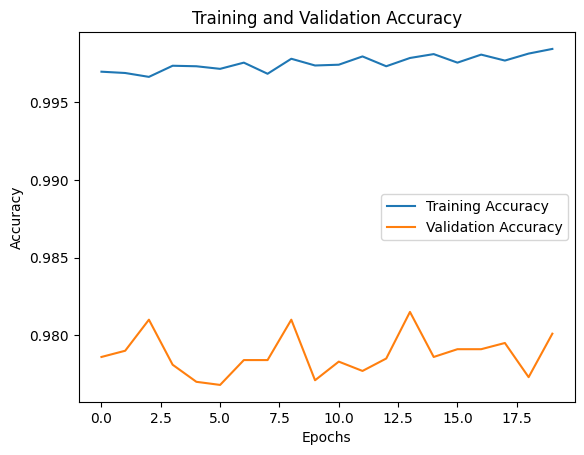

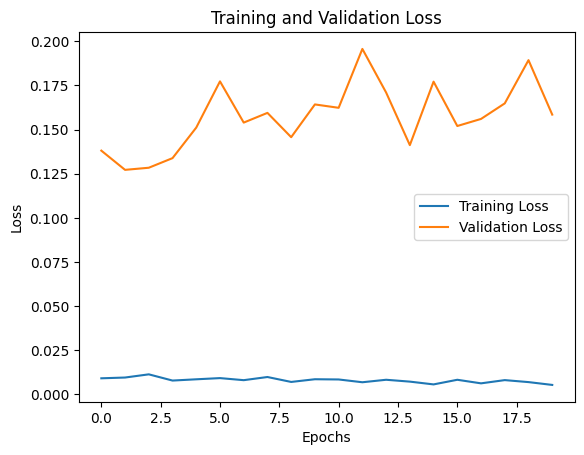

In [10]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(x_combined, y_combined, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Make predictions on custom images
custom_predictions = model.predict(custom_images)
custom_predicted_classes = np.argmax(custom_predictions, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(custom_labels, custom_predicted_classes)
print(f"Accuracy on custom images: {accuracy * 100:.2f}%")

# Print predictions
for i in range(len(custom_images)):
    print(f"Image {i}: Predicted = {custom_predicted_classes[i]}, True = {custom_labels[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Accuracy on custom images: 11.11%
Image 0: Predicted = 5, True = 1
Image 1: Predicted = 5, True = 2
Image 2: Predicted = 5, True = 3
Image 3: Predicted = 5, True = 4
Image 4: Predicted = 5, True = 5
Image 5: Predicted = 5, True = 6
Image 6: Predicted = 5, True = 7
Image 7: Predicted = 5, True = 9
Image 8: Predicted = 5, True = 8
